# Week3授業前課題2 住宅情報の分析

## 目的
・データ分析の基本的な流れを知る  
・データ分析ライブラリのPandasに慣れる  
・Kaggleのカーネルを利用する  

## エイムズ市の住宅価格
アイオワ州エイムズ市の住宅価格データセットを使い、基本的なデータの扱い方を学んでいきます。  
住宅に関する79種類もの説明変数が用意されているため、それらと価格との関係を探索していきましょう。  
エイムズがどのような街なのかもWikipediaなどで確認しておくと良いでしょう。  
[Ames, Iowa - Wikipedia](https://en.wikipedia.org/wiki/Ames,_Iowa)

## Kaggleのカーネル
Kaggleでは「カーネル」としていろいろな人がデータ探索（EDA）を行ったコードが共有されています。良いEDAをたくさん見て、ノウハウを吸収していきましょう。今回の課題をやる上でも参考にしたり、課題になっていないことに挑戦したりしてください。  
これ以降Kaggleを利用していきますので、アカウントを作成してください。  
＜参考カーネル＞  
[Comprehensive data exploration with Python | Kaggle](https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python)  
（まずはここから）  
[House Prices : EDA to ML (Beginner) | Kaggle](https://www.kaggle.com/dejavu23/house-prices-eda-to-ml-beginner)  
[A Home for Pandas and Sklearn: Beginner How-Tos | Kaggle](https://www.kaggle.com/timolee/a-home-for-pandas-and-sklearn-beginner-how-tos)  

## 4.データセットの準備
データセットはKaggleからダウンロードします。  
[House Prices: Advanced Regression Techniques | Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques)  
上記URLを開き、Dataのページへ移動してください。  
この中のtrain.csvを使用します。これをダウンロードし、Jupyter Notebookで使っているディレクトリに置いてください。  

## 【問題1】データセットの取得
pd.read_csv()を使用して、変数に格納してください。

In [1]:
# パッケージのimport
#from sklearn import datasets
import numpy as np
import pandas as pd

# [The Iris Dataset — scikit-learn 0.21.2 documentation]にあるコード実行のため
import matplotlib.pyplot as plt
%matplotlib inline
#from mpl_toolkits.mplot3d import Axes3DS
#from sklearn.decomposition import PCA

# データ抽出のため
#import numexpr

# 図示するため
import seaborn as sns

#  欠損値の確認のため
import missingno as msno

In [2]:
df = pd.read_csv('ames/train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## 【問題2】データセット自体の調査
KaggleのOverviewページや、Dataページの「Data fields」などを読みながら、どのようなデータセットかを説明してください。

1460件の住宅を立地条件や建物の質等を79の側面から評価している。

In [3]:
# 翻訳元の文章と翻訳後の文章を併記したい。
# コピペが面倒なので表計算ソフトに貼り付け、csvで出力した
# それを読み込み、整形したい

date_fields_e = pd.read_csv('ames/Datafields_e.csv').iloc[:, 1]
#print(date_fields_e)

date_fields_j = pd.read_csv('ames/Datafields_j.csv').iloc[:, 1]
#print(date_fields_j)

In [4]:
# マージする
date_fields_ej = pd.merge(date_fields_e, date_fields_j , left_index=True, right_index=True)
# 列名を修正
date_fields_ej['English'] = date_fields_ej.iloc[:, 0] 
date_fields_ej['Japanese'] = date_fields_ej.iloc[:, 1] 
# 元の分かりづらい列を削除
date_fields_ej = date_fields_ej.drop('Unnamed: 1_x', axis=1)
date_fields_ej = date_fields_ej.drop('Unnamed: 1_y', axis=1)

date_fields_ej[4:] 

,English,Japanese
4,SalePrice - the property's sale price in dolla...,SalePrice - 施設の売却価格（ドル）。これは予測しようとしているターゲット変数です。
5,MSSubClass: The building class,MSSubClass：建物クラス
6,MSZoning: The general zoning classification,MSゾーニング：一般的なゾーニング分類
7,LotFrontage: Linear feet of street connected t...,LotFrontage：不動産に接続されている通りの直線フィート
8,LotArea: Lot size in square feet,LotArea：ロットサイズ（平方フィート）
9,Street: Type of road access,通り：道路アクセスの種類
10,Alley: Type of alley access,路地：路地アクセスの種類
11,LotShape: General shape of property,LotShape：資産の一般的な形状
12,LandContour: Flatness of the property,LandContour：物件の平坦度
13,Utilities: Type of utilities available,ユーティリティ：利用可能なユーティリティの種類


## データの概観

### 【問題3】データの確認
データを確認していきます。コードとマークダウンを組み合わせてレポートしてください。  
・各特徴量がどういったものかを見る。（数値データか文字データなど）  
・今回の目的変数はどの列か確認する。  
・特徴量の平均値と標準偏差、四分位数を一度に表示させる。  

In [5]:
# 各特徴量がどういったものかを見る。（数値データか文字データなど）
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

データ型ごとの特徴量の数は、float64が3, int64が35, objectが43である。

In [6]:
# 今回の目的変数はどの列か確認する。
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

>With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.  

[House Prices: Advanced Regression Techniques | Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques)  
今回の目的変数はSalePriceである。  

In [7]:
#特徴量の平均値と標準偏差、四分位数を一度に表示させる。
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### 【問題4】欠損値への対応
欠損値に関して以下のことを行い、レポートしてください。  
・各特徴量の欠損値の有無を確認する。  
欠損値の確認にはmissingnoというライブラリを活用しましょう。このライブラリにより欠損値の有無が可視化できます。インストールや使い方に関しては以下のページをご覧ください。  
[ResidentMario/missingno: Missing data visualization module for Python.](https://github.com/ResidentMario/missingno)  
・欠損値が何パーセント含まれるかを確認する。  
・5つ以上欠損値がある特徴量（列）は削除する。  
・欠損値があるサンプル（行）は削除する。  

In [8]:
# ・各特徴量の欠損値の有無を確認する。
df.isnull().any()

Id               False
MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
Street           False
Alley             True
LotShape         False
LandContour      False
Utilities        False
LotConfig        False
LandSlope        False
Neighborhood     False
Condition1       False
Condition2       False
BldgType         False
HouseStyle       False
OverallQual      False
OverallCond      False
YearBuilt        False
YearRemodAdd     False
RoofStyle        False
RoofMatl         False
Exterior1st      False
Exterior2nd      False
MasVnrType        True
MasVnrArea        True
ExterQual        False
ExterCond        False
Foundation       False
                 ...  
BedroomAbvGr     False
KitchenAbvGr     False
KitchenQual      False
TotRmsAbvGrd     False
Functional       False
Fireplaces       False
FireplaceQu       True
GarageType        True
GarageYrBlt       True
GarageFinish      True
GarageCars       False
GarageArea       False
GarageQual 

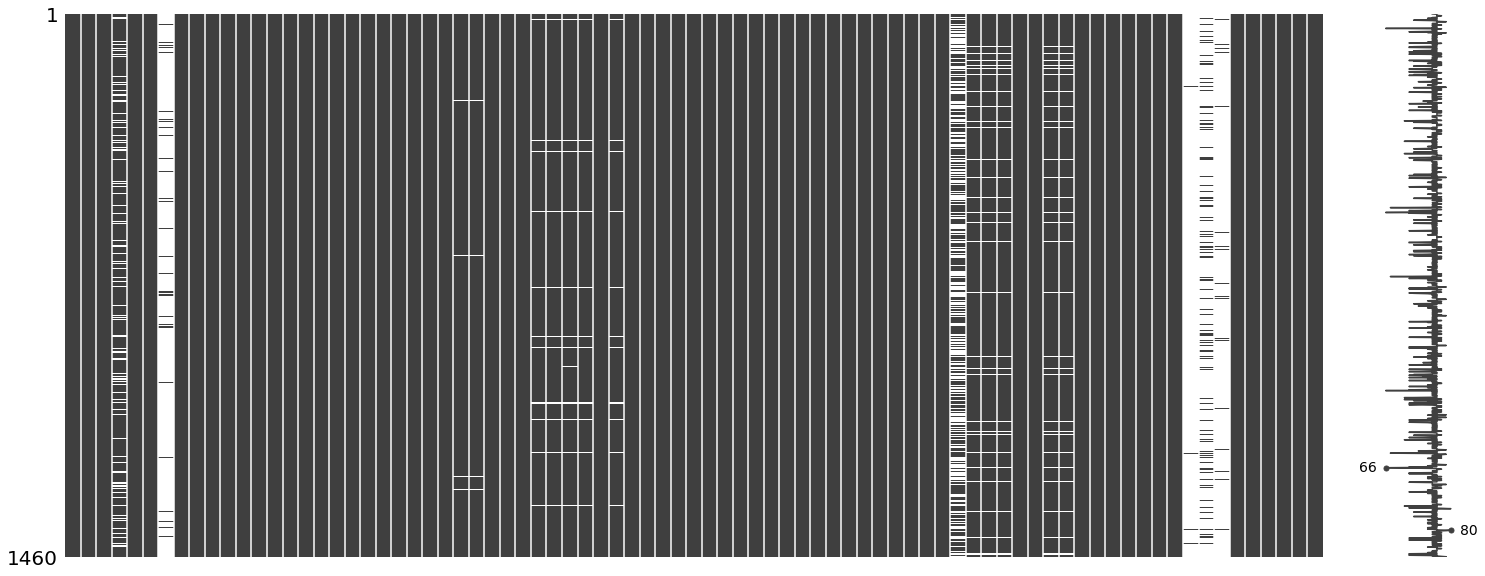

In [9]:
msno.matrix(df)

欠損値が多い列が存在する。

In [10]:
# 欠損値が何パーセント含まれるかを確認する。
df_mssing = pd.DataFrame(df.isnull().sum(), columns=['Total'])
df_mssing['missing_ratio'] = (df_mssing['Total']/1460)*100
df_mssing.sort_values('missing_ratio', ascending=False)

,Total,missing_ratio
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageYrBlt,81,5.547945
GarageCond,81,5.547945
GarageType,81,5.547945
GarageFinish,81,5.547945


PoolQC、MiscFeature、Alley、Fenceは欠損値の方が多い。  
FireplaceQuは半数近くが欠損値である。  
LotFrontage、GarageCond、GarageType、GarageYrBlt、GarageFinish、GarageQual 、BsmtExposure、BsmtFinType2、BsmtFinType1、BsmtCond、BsmtQual の欠損値も無視出来ない。  

In [11]:
# 5つ以上欠損値がある特徴量（列）は削除する。
# dropna()で欠損値を含む行、列を条件を設定し削除できる
# thresh=len(df)-5で欠損値でない要素数を指定する
# axisで軸を指定する
# inplaceで元データを変更するか指定する
df.dropna(thresh=len(df)-4, axis=1, inplace=True) 
df.shape
df.isnull().sum().sort_values(ascending=False)

Electrical       1
SalePrice        0
Heating          0
BsmtUnfSF        0
BsmtFinSF2       0
BsmtFinSF1       0
Foundation       0
ExterCond        0
ExterQual        0
Exterior2nd      0
Exterior1st      0
RoofMatl         0
RoofStyle        0
YearRemodAdd     0
YearBuilt        0
OverallCond      0
OverallQual      0
HouseStyle       0
BldgType         0
Condition2       0
Condition1       0
Neighborhood     0
LandSlope        0
LotConfig        0
Utilities        0
LandContour      0
LotShape         0
Street           0
LotArea          0
MSZoning         0
                ..
SaleCondition    0
CentralAir       0
SaleType         0
YrSold           0
MoSold           0
MiscVal          0
PoolArea         0
ScreenPorch      0
3SsnPorch        0
EnclosedPorch    0
OpenPorchSF      0
WoodDeckSF       0
PavedDrive       0
GarageArea       0
GarageCars       0
Fireplaces       0
Functional       0
TotRmsAbvGrd     0
KitchenQual      0
KitchenAbvGr     0
BedroomAbvGr     0
HalfBath    

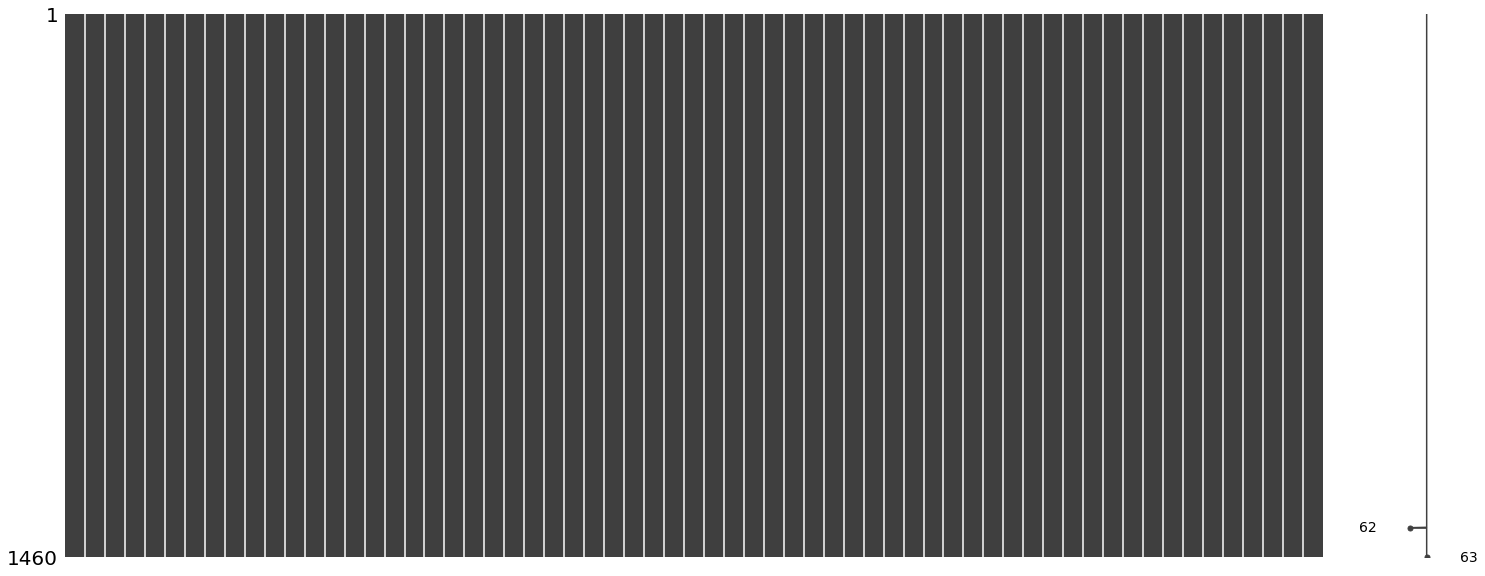

In [12]:
msno.matrix(df)

削除できているようである。

In [13]:
# 欠損値があるサンプル（行）は削除する。
# how='any'で一つでも欠損値があるものを対象とする
# howの引数はシングルクォーテーションで括ることに注意
df.dropna(how='any', axis=0, inplace=True) 
df.shape

(1459, 63)

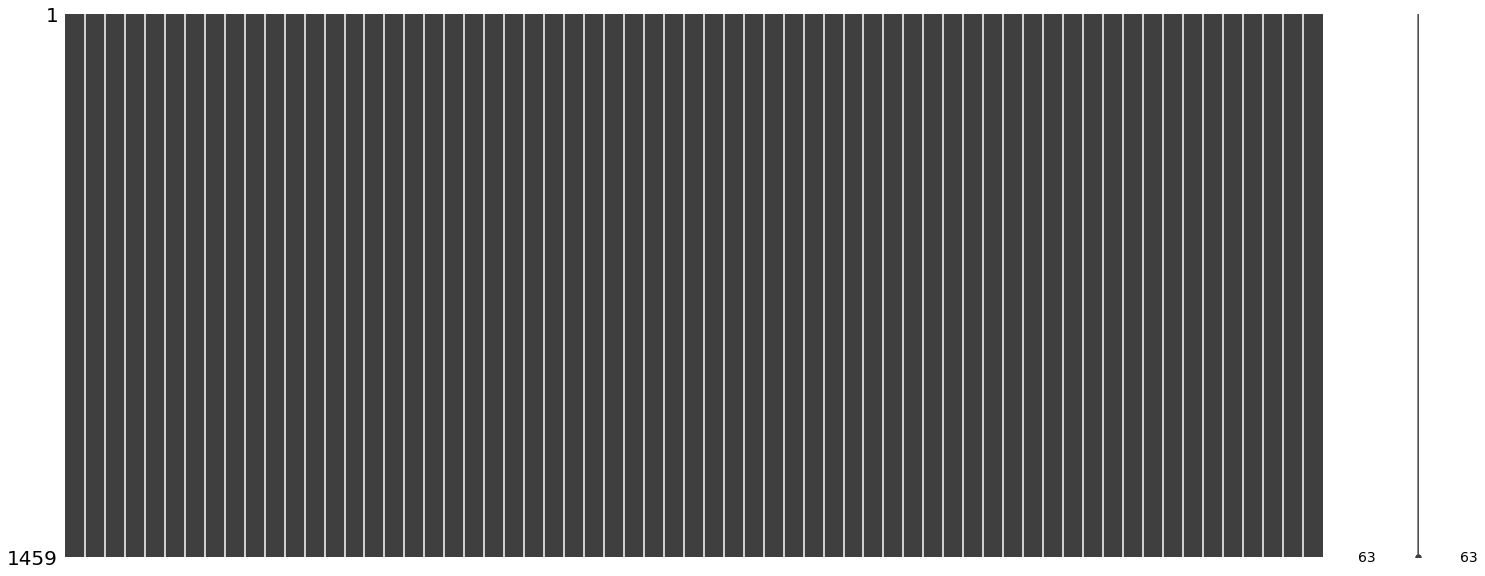

In [14]:
msno.matrix(df)

## 目的変数
次は目的変数がどのような分布を持っているか確認していきます。

### 【問題5】用語の調査
以下の２つの単語を知る必要があります。これらを調査してまとめてください。  
・尖度  
・歪度  

尖度  
kurtosis  
  
分布が正規分布からどれだけ逸脱しているかを表す統計量で、山の尖り度と裾の広がり度を示す。以下の2通りの定義がある。  
  
1.3未満のときは尖りが緩やかで裾が短い。3より大きいときは尖りが急で裾が長い。正規分布では3となる。エクセル統計の「正規確率プロットと正規性の検定」はこの定義を用いている。  サンプルサイズを$ n $、各データ$ x_i $($ i \colon 1, 2, \cdots, n $)の平均値を$ x $とすると、尖度は下式から算出される。  
  
$$
\displaystyle \frac{n\displaystyle \sum_{i = 1}^n (x_i - \overline{x})^4}  
{\left( \displaystyle \sum_{i = 1}^n (x_i - \overline{x})^2 \right)^2}  
$$

2.0未満のときは尖りが緩やかで裾が短い。0より大きいときは尖りが急で裾が長い。正規分布では0となる。Excel 関数のKURTおよびエクセル統計の「記述統計量」はこの定義を用いている。サンプルサイズを$ n $、各データ$ x_i $($ i \colon 1, 2, \cdots, n $)の平均値を$ x $、標本標準偏差を$ s $とすると、尖度は下式から算出される。

$$
\frac{n(n+1)}{(n-1)(n-2)(n-3)} \displaystyle \sum_{i = 1}^n 
\frac{(x_i - \overline{x})^4}{s^4} - \frac{3(n-1)^2}{(n-2)(n-3)}
$$

歪度
skewness

分布が正規分布からどれだけ逸脱しているかを表す統計量で、左右対称性を示す指標である。

分布の山が左にずれて裾が右に伸びているときは正の値を、山が右にずれて裾が左に伸びているときは負の値をとる。正規分布では0となる。以下の2通りの定義がある。

1.エクセル統計の「正規確率プロットと正規性の検定」はこの定義を用いている。サンプルサイズをn、各データ$ x_i $ ($ i\colon 1, 2, \cdots, n $)の平均値を$ \overline{x} $とすると、歪度は下式から算出される。
$$
\frac{\sqrt{n} \displaystyle \sum_{i = 1}^n (x_i - \overline{x})^3}
{\left( \displaystyle \sum_{i = 1}^n
(x_i - \overline{x})^2 \right)^{\frac{3}{2}}}
$$

2.Excel 関数のSKEWおよびエクセル統計の「記述統計量」はこの定義を用いている。サンプルサイズを$ n $、各データ$ x_i $($ i\colon 1, 2, \cdots, n $)の平均値を$ \overline{x} $、標本標準偏差を$ s $とすると、歪度は下式から算出される。
$$
\displaystyle　\frac{n}{(n - 1)(n - 2)} \displaystyle \sum_{i = 1}^n 
\left(\frac{x_i - \overline{x}}{s}\right)^3
$$

[統計WEB](https://bellcurve.jp/statistics/)より

### 【問題6】分布の確認
・seabornのsns.distplot()を使い目的変数の分布を表示し、「尖度」と「歪度」も算出する。  
・目的変数に対して対数変換を行う。  
・対数変換したものに対して分布を表示し、「尖度」と「歪度」も算出する。  
対数変換の前後での変化を「正規分布」という言葉を含めて説明してください。このように加工することで予測時の精度を上げることができます。  
[seaborn.distplot — seaborn 0.9.0 documentation](https://seaborn.pydata.org/generated/seaborn.distplot.html)  

尖度(Kurtosis) : 6.529263049673958
歪度(Skewness) : 1.8819429948035529


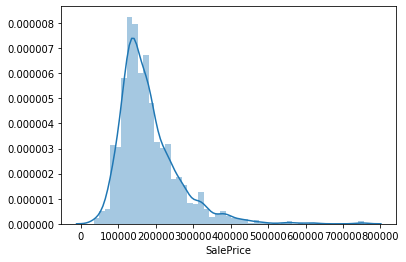

In [15]:
# seabornのsns.distplot()を使い目的変数の分布を表示し、「尖度」と「歪度」も算出する。
sns.distplot(df['SalePrice'])
# Calculate  Kurtosis andSkewness
print("尖度(Kurtosis) :", df['SalePrice'].kurt())
print("歪度(Skewness) :", df['SalePrice'].skew())

In [16]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageCars', 'GarageArea',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice'],
      dtype='object')

In [17]:
# 目的変数に対して対数変換を行う。
df_saleprice_log = df
print(df.columns)
# ここの挙動が分からない
# df_saleprice_log​にのみ'SalePrice_log'列を追加しているつもりであるが、
# dfにも追加される
df_saleprice_log['SalePrice_log'] = df_saleprice_log['SalePrice'].apply(np.log)
# DateFrame型のIndexは共有される？
# print(df.columns)
# ここでdfからSalePrice_log'を削除すると、df_saleprice_logからも削除される
# df.drop(columns='SalePrice_log', inplace=True) 
#print(df.columns)
df_saleprice_log.SalePrice_log.head()

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageCars', 'GarageArea',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice'],
      dtype='object')


0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice_log, dtype: float64

In [18]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageCars', 'GarageArea',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice', 'SalePrice_log'],
      dtype='object')

In [19]:
df_saleprice_log.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageCars', 'GarageArea',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice', 'SalePrice_log'],
      dtype='object')

尖度(Kurtosis) : 0.806927847502148
歪度(Skewness) : 0.12131775882415026


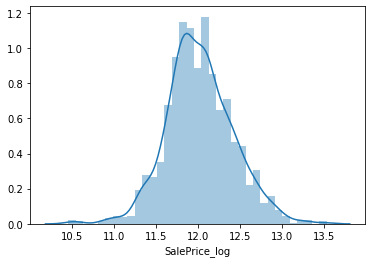

In [20]:
sns.distplot(df_saleprice_log['SalePrice_log'])
# Calculate  Kurtosis andSkewness
print("尖度(Kurtosis) :", df_saleprice_log['SalePrice_log'].kurt())
print("歪度(Skewness) :", df_saleprice_log['SalePrice_log'].skew())

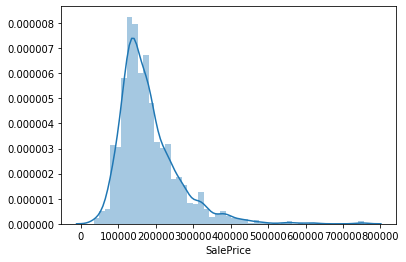

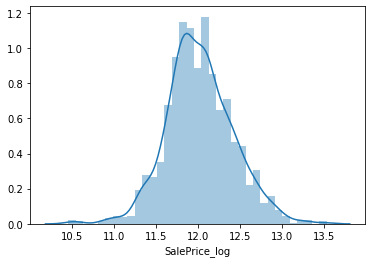

In [21]:
# 対数変換の前後での変化を「正規分布」という言葉を含めて説明してください。
sns.distplot(df_saleprice_log['SalePrice'])
plt.show()
sns.distplot(df_saleprice_log['SalePrice_log'])
plt.show()

対数化することによって、正規分布に近づいたように読み取れる。

In [22]:
# 尖度の比較
print("対数化前の尖度(Kurtosis) :{:.2f}".format(df_saleprice_log['SalePrice'].kurt()))
print("対数化後の尖度(Kurtosis) :{:.2f}".format(df_saleprice_log['SalePrice_log'].kurt()))

対数化前の尖度(Kurtosis) :6.53
対数化後の尖度(Kurtosis) :0.81


対数化前の尖度は6.53と正規分布より尖った分布をしている。
対数化後の尖度は0.81と正規分布より尖ってはいるが、対数化前と比較すると０に近づいた。つまり、正規分布の尖り方に近い分布になった。

In [23]:
# 歪度の比較
print("対数化前の歪度(Skewness) :{:.2f}".format(df_saleprice_log['SalePrice'].skew()))
print("対数化後の歪度(Skewness) :{:.2f}".format(df_saleprice_log['SalePrice_log'].skew()))

対数化前の歪度(Skewness) :1.88
対数化後の歪度(Skewness) :0.12


対数化前の歪度は1.88と左に偏った分布をしている。  
対数化後の歪度は0.12と若干左に偏ってはいるが、0に近づき、左右対称に近づいた。つまり、正規分布の分布に近づいた。

## 特徴量

### 【問題7】相関係数の確認
特徴量の確認をしていきます。それぞれに対してマークダウンで説明や考察を書いてください。  
・相関係数行列のヒートマップを作り、相関係数の高い関係を見つける。  
・目的変数との相関の高い特徴量10個を選び、これらだけの相関係数行列ヒートマップを作る。  
・選んだ10個の特徴量が何か表しているかをKaggleのDataDescriptionの記述を参考に日本語でまとめる。  
・選んだ10個の特徴量の中でお互いの相関係数が高い組み合わせを3つ探し出す。  
**補足**  
重回帰分析などで予測する場合、相関が高すぎる特徴量の組み合わせがあると予測に悪影響が出ることがあります。このような場合の簡単な対処方法として、そういった特徴量の組みを探し出して、１つに絞るということがあります。  

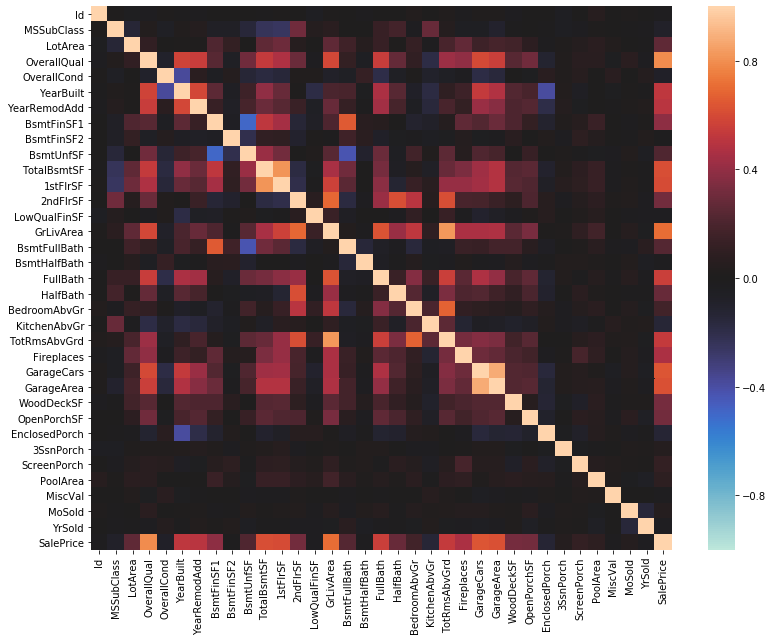

In [24]:
# 相関係数行列のヒートマップを作り、相関係数の高い関係を見つける。
# method='spearman'でスピアマン、'kendall'でケンドールも指定可能

# Salepriceを対数化して、Saleprice_logを削除する
df['SalePrice'].apply(np.log)
df.drop(columns='SalePrice_log', inplace=True) 

corr_mat = df.corr(method='pearson')

plt.figure(figsize=(13,10))
sns.heatmap(corr_mat,
            vmin=-1.0,
            vmax=1.0,
            center=0,
            xticklabels=corr_mat.columns.values,
            yticklabels=corr_mat.columns.values
           )
plt.show()


In [25]:
# 相関係数-0.3から0.３の特徴量
df_saleprice_low_corr = corr_mat[(corr_mat['SalePrice'].values>-0.3)&(corr_mat['SalePrice'].values<0.3)]
#display(df_saleprice_low_corr)
print(df_saleprice_low_corr['SalePrice'])

Id              -0.021756
MSSubClass      -0.084230
LotArea          0.263837
OverallCond     -0.077924
BsmtFinSF2      -0.011412
BsmtUnfSF        0.214446
LowQualFinSF    -0.025620
BsmtFullBath     0.227082
BsmtHalfBath    -0.016873
HalfBath         0.284400
BedroomAbvGr     0.168235
KitchenAbvGr    -0.135935
EnclosedPorch   -0.128627
3SsnPorch        0.044571
ScreenPorch      0.111419
PoolArea         0.092397
MiscVal         -0.021200
MoSold           0.046380
YrSold          -0.028907
Name: SalePrice, dtype: float64


In [26]:
# 相関係数-0.3以下の特徴量
df_saleprice_negitive_corr = corr_mat[(corr_mat['SalePrice'].values<=-0.3)]
df_saleprice_negitive_corr.index

Index([], dtype='object')

SalePriceとの相関については、このヒートマップの最後の行、あるいは列を確認する。  
19の特徴量は、SalePriceとの相関係数の絶対値が0.３未満である。  
相関係数が-0.3以下の特徴量はない。
相関関係の強い特徴量に関しては、正の相関関係しかないようである。

In [27]:
# 目的変数との相関の高い特徴量10個を選び、これらだけの相関係数行列ヒートマップを作る。
# 目的変数との相関指数でソートする
corr_mat_saleprice = corr_mat['SalePrice'].sort_values(ascending=False)
# スライスする
display(corr_mat_saleprice[1:11])
display(corr_mat_saleprice[1:11].index)

OverallQual     0.791069
GrLivArea       0.708618
GarageCars      0.640473
GarageArea      0.623423
TotalBsmtSF     0.613905
1stFlrSF        0.605968
FullBath        0.560881
TotRmsAbvGrd    0.533779
YearBuilt       0.523273
YearRemodAdd    0.507430
Name: SalePrice, dtype: float64

Index(['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF',
       '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd'],
      dtype='object')

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd
0,7,1710,2,548,856,856,2,8,2003,2003
1,6,1262,2,460,1262,1262,2,6,1976,1976
2,7,1786,2,608,920,920,2,6,2001,2002
3,7,1717,3,642,756,961,1,7,1915,1970
4,8,2198,3,836,1145,1145,2,9,2000,2000


,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd
OverallQual,1.000000,0.593021,0.600991,0.561980,0.537523,0.475933,0.551267,0.427720,0.573334,0.551605
GrLivArea,0.593021,1.000000,0.467321,0.468971,0.455001,0.566084,0.630283,0.825576,0.199286,0.287677
GarageCars,0.600991,0.467321,1.000000,0.882613,0.435279,0.439726,0.469619,0.362248,0.537866,0.420573
GarageArea,0.561980,0.468971,0.882613,1.000000,0.486719,0.489741,0.405944,0.337915,0.479460,0.372012
TotalBsmtSF,0.537523,0.455001,0.435279,0.486719,1.000000,0.819393,0.324886,0.286125,0.393159,0.292546


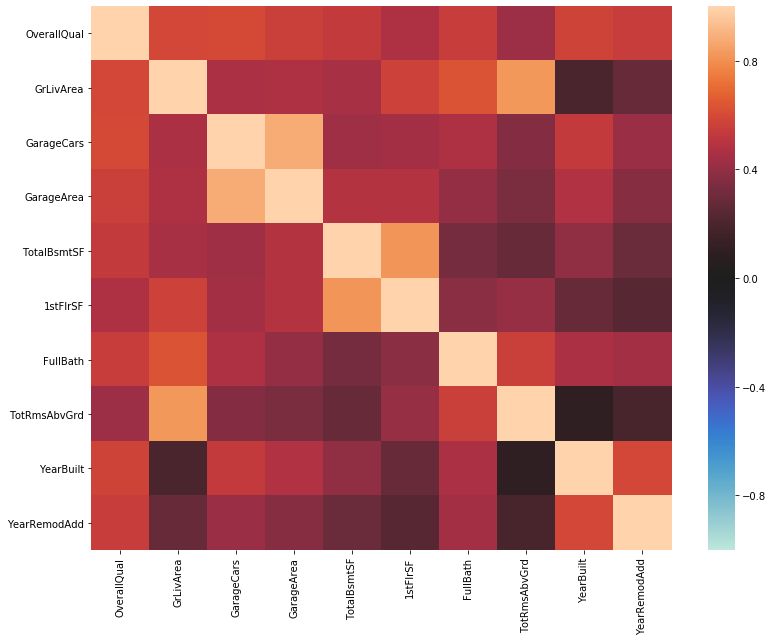

In [28]:
# この時点ではまだ相関係数行列ではない
df_saleprice_high_corr_columns = df[corr_mat_saleprice[1:11].index]
display(df_saleprice_high_corr_columns.head())

# 相関係数行列に変換する
df_saleprice_high_corr = df_saleprice_high_corr_columns.corr()
display(df_saleprice_high_corr.head())


plt.figure(figsize=(13,10))
sns.heatmap(df_saleprice_high_corr,
            vmin=-1.0,
            vmax=1.0,
            center=0
           )
plt.show()

正の相関関係を持つものばかりであるが、SalePriceと正の相関を持つもの集めたので当然であると思われる。  
相関係数が低い組合せが気になる。  
後ほど確認したい。  

>選んだ10個の特徴量が何か表しているかをKaggleのDataDescriptionの記述を参考に日本語でまとめる。

'OverallQual':全体的な素材と仕上げの品質
'GrLivArea':地上階のリビングエリア平方フィート
'GarageCars':ガレージに自動車がどれだけ入るか
'GarageArea':ガレージサイズ（平）方フィート
'TotalBsmtSF'地下室の総平方フィート
'1stFlrSF':1階平方フィート
'FullBath': 地上階のバスルームの数
'TotRmsAbvGrd':バスルームを除いた地上階の部屋数
'YearBuilt':築年
'YearRemodAdd':改築した年


In [29]:
#選んだ10個の特徴量の中でお互いの相関係数が高い組み合わせを3つ探し出す。

def find_combinations_high_corr(df, a=3):
    '''
    相関係数の高い特徴量の組み合わせを抽出する
    
    df:対象dataframe
    a:取り出す数
    
    良い方法が思いつかないので、一旦リストに入れて、値でソート、その値だったら取り出す
    '''
    df_ans = pd.DataFrame([]) # 途中結果入れる
    df_ans_checked = pd.DataFrame([]) # 最終結果を入れる
    for d_index in df.columns:
        #print(d_index)
        for d_column in df.columns:
            #print(d_column)
            # 同じ特徴量同士の組み合わせは不要
            # 行と列が入れ替わった組み合わせは不要
            if d_index !=d_column and df.index.get_loc(d_index) > df.index.get_loc(d_column):
                #print(d_index)
                #print(df.loc[d_index, d_column])
                df_ans.loc[d_index, d_column] = df.loc[d_index, d_column]
                
    #display(df_ans.values)
    arry_pre = df_ans.values
    #print(arry_pre.size)
    # １次元にする
    arry_pre = arry_pre.reshape((arry_pre.size))
    # 降順にソートする
    arry_pre_sort = np.sort(arry_pre)[::-1]
    arry_pre_non_nan = arry_pre_sort[~np.isnan(arry_pre_sort)]
    arry_check = arry_pre_non_nan[:a]
    #print(arry_chek)
    
    for d_index in df.columns:
    #print(d_index)
        for d_column in df.columns:
            #print(d_column)
            # 同じ特徴量同士の組み合わせは不要
            # 行と列が入れ替わった組み合わせは不要
            # print(df.loc[d_index, d_column] in arry_check)
            if  d_index !=d_column and df.loc[d_index, d_column] in arry_check:
                #print(arry_check)
                #print(df.loc[d_index, d_column])
                #print(d_index)
                #print(df.loc[d_index, d_column])
                df_ans_checked.loc[d_index, d_column] = df.loc[d_index, d_column]
    
    
    return df_ans_checked

In [30]:
# test
date_test = [{'a': i **i , 'b': 2*i, 'c': 1.2**i}
                    for i in range(3)]
print(date_test)
df_test0 = pd.DataFrame(date_test)
df_test0_corr = df_test0.corr()
display(df_test0_corr)
df_test1 = find_combinations_high_corr(df_test0_corr, 1)
df_test1

[{'a': 1, 'b': 0, 'c': 1.0}, {'a': 1, 'b': 2, 'c': 1.2}, {'a': 4, 'b': 4, 'c': 1.44}]


,a,b,c
a,1.000000,0.866025,0.891042
b,0.866025,1.000000,0.998625
c,0.891042,0.998625,1.000000


,c,b
b,0.998625,NaN
c,NaN,0.998625


 計算は出来ていそう。  
もっと良い方法がありそう。  
列の順番が入れ替わってしまう。  

In [31]:
df_high_corr = find_combinations_high_corr(df_saleprice_high_corr)
df_high_corr

,TotRmsAbvGrd,GarageArea,GarageCars,1stFlrSF,TotalBsmtSF,GrLivArea
GrLivArea,0.825576,NaN,NaN,NaN,NaN,NaN
GarageCars,NaN,0.882613,NaN,NaN,NaN,NaN
GarageArea,NaN,NaN,0.882613,NaN,NaN,NaN
TotalBsmtSF,NaN,NaN,NaN,0.819393,NaN,NaN
1stFlrSF,NaN,NaN,NaN,NaN,0.819393,NaN
TotRmsAbvGrd,NaN,NaN,NaN,NaN,NaN,0.825576


>選んだ10個の特徴量の中でお互いの相関係数が高い組み合わせを3つ探し出す。

お互いに相関係数が高い組み合わせは以下の通りである。  
(1)GarageAreaとGarageCars  
(2)TotRmsAbvGrdとTotalBsmtSF  
(3)GrLivAreaとTotRmsAbvGrd  
  
  
(1)は車庫の大きさ、(2)地上階と地下階の広さ、(3)はバスルームとそれ以外の部屋数である。  
どちらか一方の値が高ければ、もう一方の値が高いことは現実的な意味合いからして、妥当であると思われる。  